In [1]:
import random

import pandas

from hilbert.curves import Polynomial, Xlog

from curve_fits import Call, Spec

from curve_fits import frames

In [2]:
def random_ints_array(size, max_abs=100):
    return random.choices(range(-max_abs, max_abs), k=size)

In [3]:
size_range = range(2400, 2500)
init_calls = [Call(random_ints_array(size)) for size in size_range]
profile = frames.TimeComplexityProfile('list', init_calls, {'pop': Call(), 'copy': Call(), 'sort': Call()},
    index=pandas.Index(size_range, name='List length'), loops=100, overfit=-6, fraction=0.9)

In [4]:
profile.fit_all_with(Call(Spec(Polynomial, 2)), Call(Spec(Xlog, 1, pole=1000)))

In [5]:
profile.best_fits(limit=None)

kind                                            fit DOF
key  cost                                                                
pop  0.000993  Poly(1)     (0.021 ± 0.023) + (0.0000081 ± 0.0000093)x   2
     0.002648     Xlog  (0.000003880 ± 2.7E-8)(x - 1000)log(x - 1000)   1
copy 0.005430     Xlog  (0.000004395 ± 4.8E-8)(x - 1000)log(x - 1000)   1
     0.006433  Poly(1)      (-0.105 ± 0.045) + (0.000062 ± 0.000018)x   2
sort 0.018217     Xlog   (0.00003896 ± 1.4E-7)(x - 1000)log(x - 1000)   1
     0.022021  Poly(1)        (-0.08 ± 0.12) + (0.000199 ± 0.000051)x   2

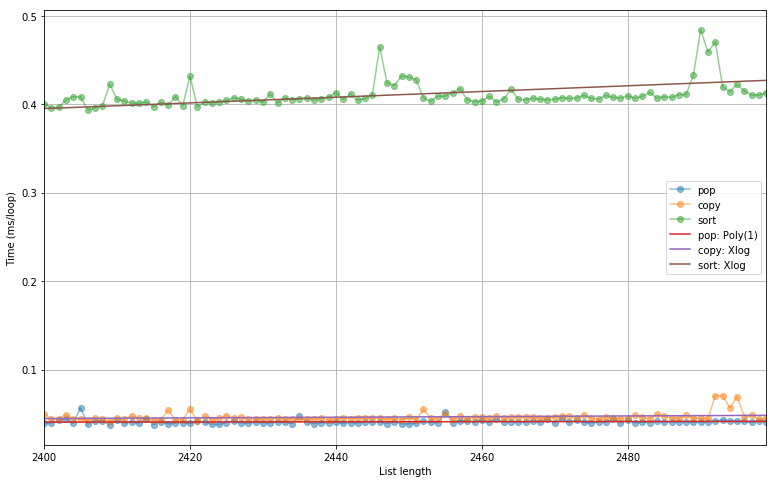

In [6]:
fig, ax = profile.plot(limit=1)

In [7]:
[fit.measures for fit in profile.best_fits(1).fit]

[(<Measure: 0.021 ± 0.023>, <Measure: 0.0000081 ± 0.0000093>),
 (<Measure: 0.000004395 ± 4.8E-8>,),
 (<Measure: 0.00003896 ± 1.4E-7>,)]

In [8]:
profile.best_fit('sort'), profile.best_fit('pop')

(<CurveFit: (0.00003896 ± 1.4E-7)(x - 1000)log(x - 1000)>,
 <CurveFit: (0.021 ± 0.023) + (0.0000081 ± 0.0000093)x>)